## Let's explore the dataset

### Centralized imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tarfile
import random

### Let's have a look at the content of the tar file

In [2]:
tar_path = 'cifar-10-python.tar'

# First, inspect the contents of the tar file
with tarfile.open(tar_path, 'r') as tar:
    print("Contents of the tar file:")
    for member in tar.getmembers():
        print(f"  {member.name}")
    print("\n")

Contents of the tar file:
  cifar-10-batches-py
  cifar-10-batches-py/data_batch_4
  cifar-10-batches-py/readme.html
  cifar-10-batches-py/test_batch
  cifar-10-batches-py/data_batch_3
  cifar-10-batches-py/batches.meta
  cifar-10-batches-py/data_batch_2
  cifar-10-batches-py/data_batch_5
  cifar-10-batches-py/data_batch_1




### Function to load data directly from tar (via pickle)

In [3]:
def load_pickle_from_tar(tar_path, pickle_path):
    with tarfile.open(tar_path, 'r') as tar:
        member = tar.getmember(pickle_path)
        f = tar.extractfile(member)
        data_dict = pickle.load(f, encoding='bytes')
    return data_dict

### Let's load the data

In [4]:
train_data = []
train_labels = []

# The path structure below is based on the standard CIFAR-10 distribution
# We first inspect the tar contents above to verify this structure
for i in range(1, 6):
    batch_path = f'cifar-10-batches-py/data_batch_{i}'
    batch_dict = load_pickle_from_tar(tar_path, batch_path)
    train_data.append(np.vstack(batch_dict[b'data']))
    train_labels.extend(batch_dict[b'labels'])

train_data = np.vstack(train_data)

### Load test data and label names

In [5]:
# Load test data
print("Loading test data...")
test_batch_path = 'cifar-10-batches-py/test_batch'
test_dict = load_pickle_from_tar(tar_path, test_batch_path)
test_data = test_dict[b'data']
test_labels = test_dict[b'labels']

# Load label names
print("Loading label names...")
meta_path = 'cifar-10-batches-py/batches.meta'
meta_dict = load_pickle_from_tar(tar_path, meta_path)
label_names = [label.decode('utf-8') for label in meta_dict[b'label_names']]

# Print basic info about the data
print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")
print(f"Label names: {label_names}")

Loading test data...
Loading label names...
Training data shape: (50000, 3072)
Test data shape: (10000, 3072)
Label names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


### Convert data to images (go from 1D to 3D)

In [6]:
print("Converting to image format...")
train_images = train_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
test_images = test_data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

print(f"Training images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")

Converting to image format...
Training images shape: (50000, 32, 32, 3)
Test images shape: (10000, 32, 32, 3)


### Show some random images

Displaying random images from the dataset:


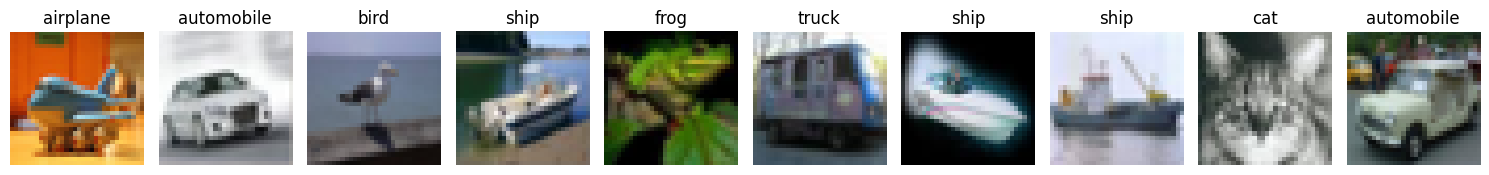

In [7]:
def display_random_images(images, labels, label_names, num_images=10):
    indices = random.sample(range(len(images)), num_images)
    
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(indices):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[idx])
        plt.title(f"{label_names[labels[idx]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display random images
print("Displaying random images from the dataset:")
display_random_images(train_images, train_labels, label_names)

### Do some analysis (class distribution)


Class distribution in training data:


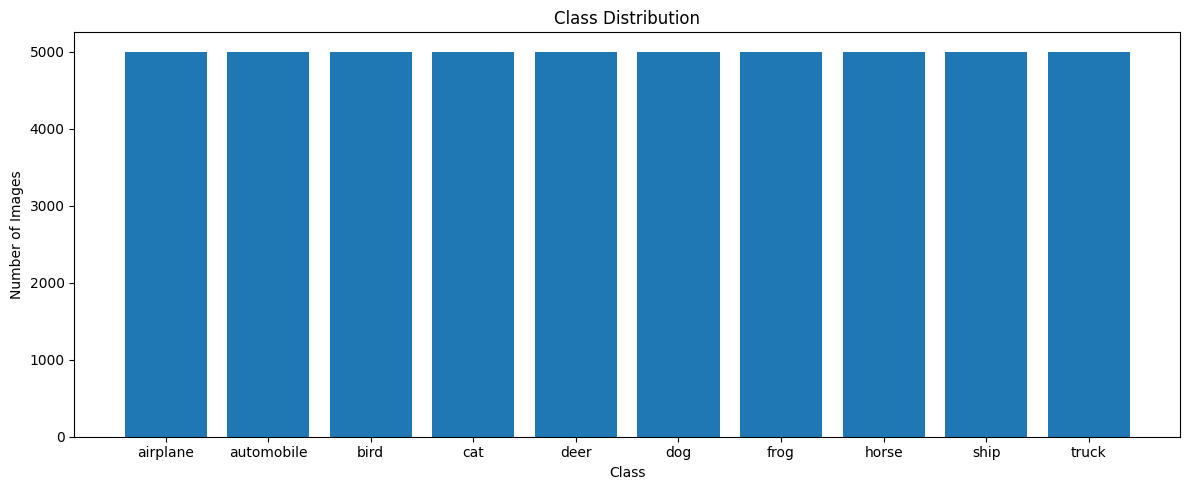

airplane: 5000 images
automobile: 5000 images
bird: 5000 images
cat: 5000 images
deer: 5000 images
dog: 5000 images
frog: 5000 images
horse: 5000 images
ship: 5000 images
truck: 5000 images


In [8]:
def analyze_class_distribution(labels, label_names):
    unique_labels, counts = np.unique(labels, return_counts=True)
    
    plt.figure(figsize=(12, 5))
    plt.bar(range(len(unique_labels)), counts)
    plt.xticks(range(len(unique_labels)), [label_names[i] for i in unique_labels])
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.tight_layout()
    plt.show()
    
    for i, (label, count) in enumerate(zip(unique_labels, counts)):
        print(f"{label_names[label]}: {count} images")

print("\nClass distribution in training data:")
analyze_class_distribution(train_labels, label_names)


Showing examples of each class:

Displaying images of class: airplane (class index: 0)


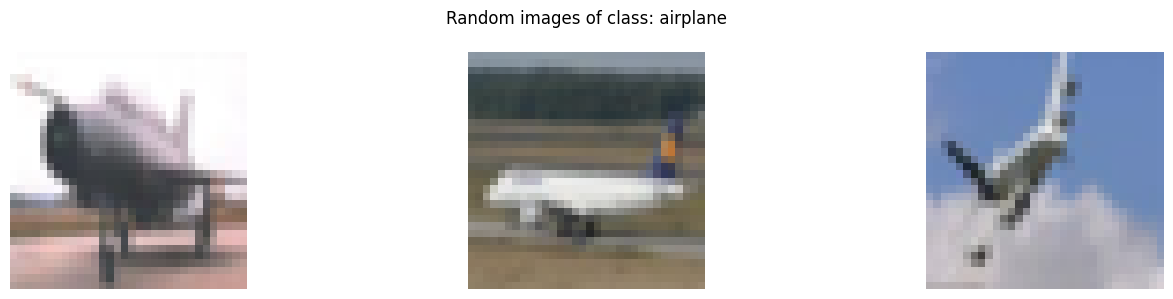


Displaying images of class: automobile (class index: 1)


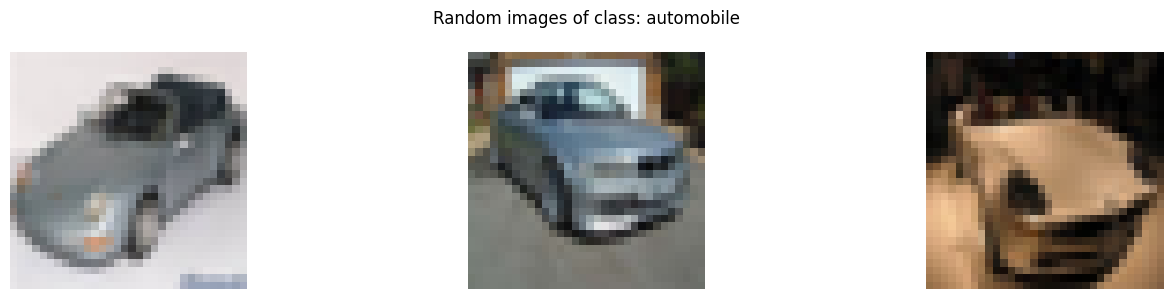


Displaying images of class: bird (class index: 2)


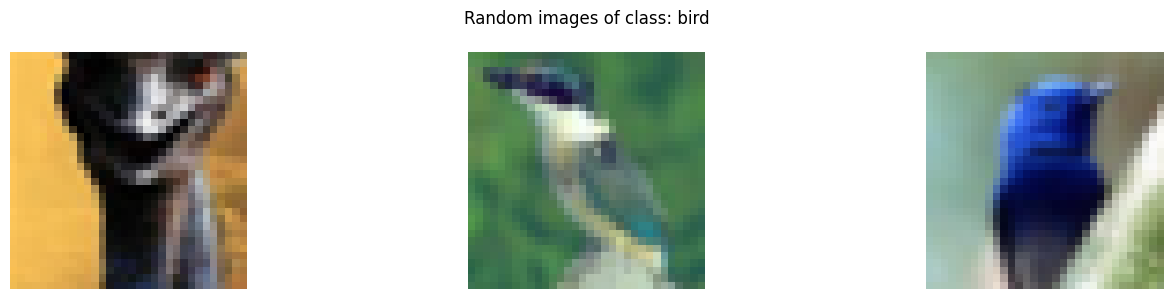


Displaying images of class: cat (class index: 3)


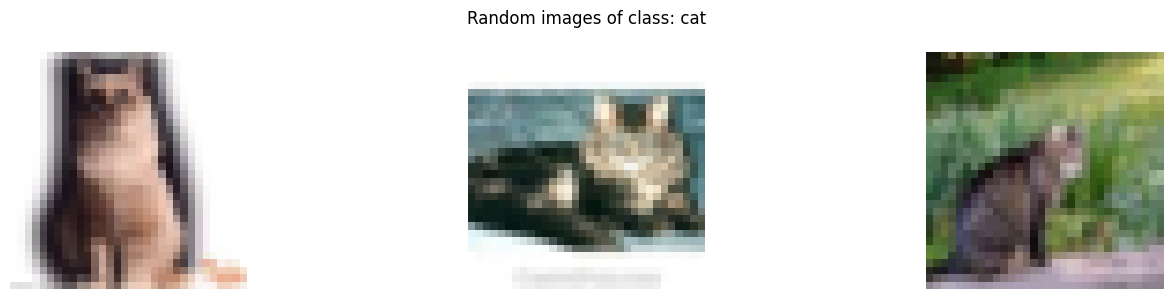


Displaying images of class: deer (class index: 4)


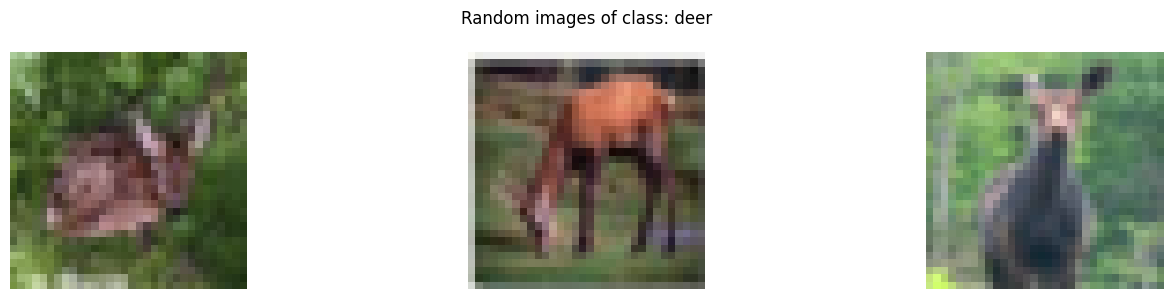


Displaying images of class: dog (class index: 5)


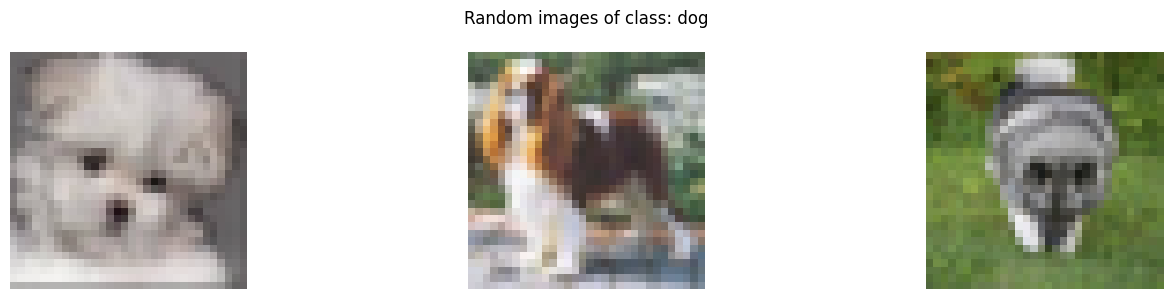


Displaying images of class: frog (class index: 6)


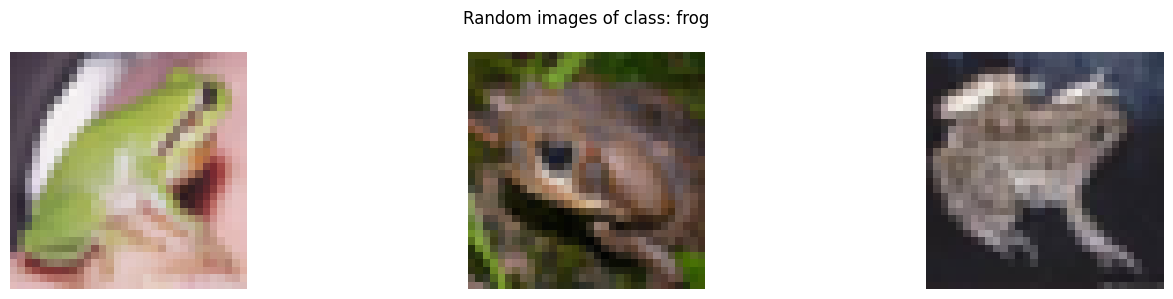


Displaying images of class: horse (class index: 7)


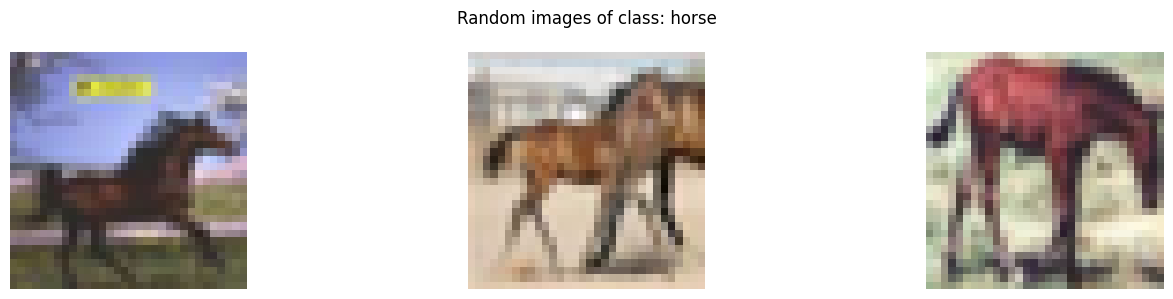


Displaying images of class: ship (class index: 8)


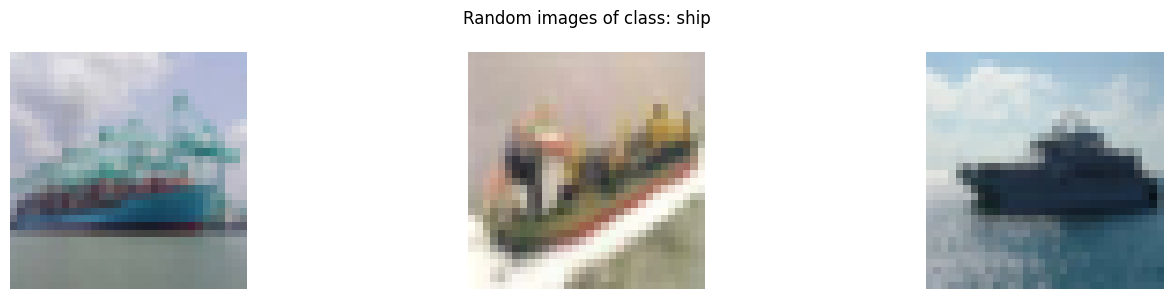


Displaying images of class: truck (class index: 9)


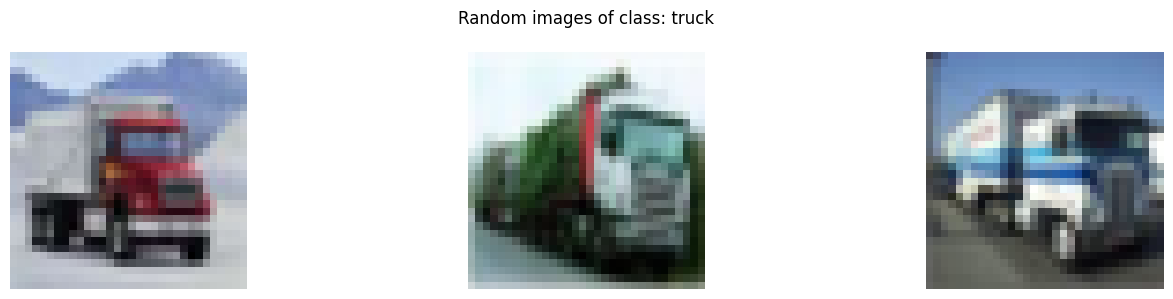

In [9]:
def display_class_images(images, labels, class_idx, label_names, num_images=10):
    class_indices = [i for i, label in enumerate(labels) if label == class_idx]
    selected_indices = random.sample(class_indices, min(num_images, len(class_indices)))
    
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(selected_indices):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[idx])
        plt.axis('off')
    plt.suptitle(f"Random images of class: {label_names[class_idx]}")
    plt.tight_layout()
    plt.show()

# Display images for each class
print("\nShowing examples of each class:")
for class_idx, class_name in enumerate(label_names):
    print(f"\nDisplaying images of class: {class_name} (class index: {class_idx})")
    display_class_images(train_images, train_labels, class_idx, label_names, num_images=3)